#Group 1
Fabio Ceruti - Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the code that we used to carry out the error analysis for the suit of models developed in the other sections.


In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from random import shuffle
from tensorflow.keras import models
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
import matplotlib.cm as cm
from IPython.display import Image, display
import cv2
import pickle

## Saturation
In this section we will extract the saturation for each model and for each picture, testing for significant differences between correctly classified and missclassified

In [27]:
def saturation_calculator(path):
  # The function returns the saturation for the given image
  img = cv2.imread(path)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return img_hsv[:, :, 1].mean()

In [28]:
def saturation_comparison(df):
  #extracting and collecting, for each picture, the saturation. The saturation is stored in either 
  #species_dict_correct or species_dict_miss depending on whether missclassification took place
  species_dict_correct={}
  species_dict_miss={}
  species_set=set(df['species'])
  for i in tqdm(species_set):
    saturation_correct=[]
    saturation_miss=[]
    temp_df_corr = df[(df['species']== i) & (df['misclassified']==0)].reset_index(drop=True)
    temp_df_wrong =  df[(df['species']== i) & (df['misclassified']==1)].reset_index(drop=True)
    for j in range(temp_df_corr.shape[0]):
      saturation_correct.append(saturation_calculator(temp_df_corr.loc[j,'google_path']))
    for j in range(temp_df_wrong.shape[1]):
      saturation_miss.append(saturation_calculator(temp_df_wrong.loc[j,'google_path']))
    species_dict_correct[i]=saturation_correct
    species_dict_miss[i]=saturation_miss
  return species_dict_miss, species_dict_correct

### Mask saturation differences

In [38]:
with open('/content/transfer_masked_testresults.pickle', "rb") as f:
    masked = pickle.load(f)

mis = []
for true, pred in zip(masked['label'], masked['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
masked['misclassified'] = mis
masked['species'] = [i.split('/')[1] for i in masked['path']]
masked['google_path']='/content/drive/MyDrive/'+masked['path']

In [ ]:
species_dict_miss, species_dict_correct = saturation_comparison(masked)

100%|██████████| 12/12 [00:17<00:00,  1.45s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Saturation differences for masked photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for masked photos 

Pandion haliaetus t-value: 1.43
Procyon lotor t-value: -1.708*
Pachydiplax longipennis t-value: 1.401
Canis latrans t-value: -0.087
Spinus tristis t-value: -0.637
Trachemys scripta elegans t-value: -0.811
Harmonia axyridis t-value: 2.75***
Picoides pubescens t-value: -0.47
Sciurus carolinensis t-value: 1.873*
Junonia coenia t-value: 0.476
Anolis carolinensis t-value: 1.915*


### Vanilla

In [4]:
with open('/content/transfer_vanilla_testresults.pickle', "rb") as f:
    vanilla = pickle.load(f)

mis = []
for true, pred in zip(vanilla['label'], vanilla['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
vanilla['misclassified'] = mis
vanilla['species'] = [i.split('/')[1] for i in vanilla['path']]
vanilla['google_path']='/content/drive/MyDrive/'+vanilla['path']

In [ ]:
species_dict_miss, species_dict_correct = saturation_comparison(vanilla)

100%|██████████| 12/12 [00:27<00:00,  2.32s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(vanilla['species'])
print('Saturation differences for vanilla photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for vanilla photos 

Pandion haliaetus t-value: 0.037
Procyon lotor t-value: -1.096
Pachydiplax longipennis t-value: 1.991**
Canis latrans t-value: 0.043
Spinus tristis t-value: 1.066
Trachemys scripta elegans t-value: 1.172
Harmonia axyridis t-value: -0.064
Chelydra serpentina t-value: -0.87
Picoides pubescens t-value: -0.716
Sciurus carolinensis t-value: 0.021
Junonia coenia t-value: 1.268
Anolis carolinensis t-value: 1.707*


### Bbcontent

In [40]:
with open('/content/transfer_bbcontent_testresults.pickle', "rb") as f:
    bbcontent = pickle.load(f)

mis = []
for true, pred in zip(bbcontent['label'], bbcontent['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
bbcontent['misclassified'] = mis
bbcontent['species'] = [i.split('/')[1] for i in bbcontent['path']]
bbcontent['google_path']='/content/drive/MyDrive/'+bbcontent['path']

In [ ]:
species_dict_miss, species_dict_correct = saturation_comparison(bbcontent)

100%|██████████| 12/12 [00:26<00:00,  2.20s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(bbcontent['species'])
print('Saturation differences for bbcontent photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for bbcontent photos 

Pandion haliaetus t-value: -1.579
Procyon lotor t-value: -1.621
Pachydiplax longipennis t-value: 1.371
Canis latrans t-value: -0.15
Spinus tristis t-value: -0.852
Trachemys scripta elegans t-value: 0.411
Harmonia axyridis t-value: 2.291**
Chelydra serpentina t-value: 0.474
Picoides pubescens t-value: 0.415
Sciurus carolinensis t-value: -1.272
Junonia coenia t-value: -1.227
Anolis carolinensis t-value: 0.32


### Mixed

In [3]:
with open('/content/transfer_mixed_testresults.pickle', "rb") as f:
    mixed = pickle.load(f)

mis = []
for true, pred in zip(mixed['label'], mixed['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
mixed['misclassified'] = mis
mixed['species'] = [i.split('/')[1] for i in mixed['path']]
mixed['google_path']='/content/drive/MyDrive/'+mixed['path']

In [8]:
species_dict_miss, species_dict_correct = saturation_comparison(mixed)

100%|██████████| 12/12 [04:53<00:00, 24.50s/it]


In [9]:
from scipy.stats import ttest_ind
species_set=set(mixed['species'])
print('Saturation differences for mixed photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for mixed photos 

Canis latrans t-value: 1.139
Sciurus carolinensis t-value: -0.464
Anolis carolinensis t-value: 0.31
Pachydiplax longipennis t-value: 1.014
Procyon lotor t-value: -1.448
Pandion haliaetus t-value: 0.325
Trachemys scripta elegans t-value: -0.898
Spinus tristis t-value: 1.717*
Chelydra serpentina t-value: 0.148
Harmonia axyridis t-value: -0.049
Junonia coenia t-value: 0.481
Picoides pubescens t-value: -0.89


## Contrast
In this section we will extract the contrast for each model and for each picture, testing for significant differences between correctly classified and missclassified

In [10]:
def contrast_comparison(df):
  #extracting and collecting, for each picture, the contrast. The contrast is stored in either 
  #species_dict_correct or species_dict_miss depending on whether missclassification took place
  species_dict_correct={}
  species_dict_miss={}
  species_set=set(df['species'])
  for i in tqdm(species_set):
    contrast_correct=[]
    contrast_miss=[]
    temp_df_corr = df[(df['species']== i) & (df['misclassified']==0)].reset_index(drop=True)
    temp_df_wrong =  df[(df['species']== i) & (df['misclassified']==1)].reset_index(drop=True)
    for j in range(temp_df_corr.shape[0]):
      contrast_correct.append(contrast_calculator(temp_df_corr.loc[j,'google_path']))
    for j in range(temp_df_wrong.shape[1]):
      contrast_miss.append(contrast_calculator(temp_df_wrong.loc[j,'google_path']))
    species_dict_correct[i]=contrast_correct
    species_dict_miss[i]=contrast_miss
  return species_dict_miss, species_dict_correct

In [11]:
def contrast_calculator(path):
  # The function returns the contrast for the given image
  img = cv2.imread(path)

  lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
  L,A,B=cv2.split(lab)

  # compute minimum and maximum in 5x5 region using erode and dilate
  kernel = np.ones((15,15),np.uint8)
  min = cv2.erode(L,kernel,iterations = 15)
  max = cv2.dilate(L,kernel,iterations = 15)

  # convert min and max to floats
  min = min.astype(np.float64) 
  max = max.astype(np.float64) 

  contrast = (max-min)/(max+min)
  average_contrast = 100*np.mean(contrast)
  return average_contrast


### Masked

In [ ]:
with open('/content/transfer_masked_testresults.pickle', "rb") as f:
    masked = pickle.load(f)

mis = []
for true, pred in zip(masked['label'], masked['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
masked['misclassified'] = mis
masked['species'] = [i.split('/')[1] for i in masked['path']]
masked['google_path']='/content/drive/MyDrive/'+masked['path']

In [ ]:
species_dict_miss, species_dict_correct = contrast_comparison(masked)

100%|██████████| 12/12 [00:30<00:00,  2.51s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Saturation differences for masked photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for masked photos 

Pandion haliaetus t-value: -3.516***
Procyon lotor t-value: 0.08
Pachydiplax longipennis t-value: -0.345
Canis latrans t-value: -0.06
Spinus tristis t-value: 0.74
Trachemys scripta elegans t-value: -1.718
Harmonia axyridis t-value: -1.538
Picoides pubescens t-value: -0.215
Sciurus carolinensis t-value: 0.582
Junonia coenia t-value: 1.684*
Anolis carolinensis t-value: 3.631***


### Vanilla

In [ ]:
with open('/content/transfer_vanilla_testresults.pickle', "rb") as f:
    vanilla = pickle.load(f)

mis = []
for true, pred in zip(vanilla['label'], vanilla['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
vanilla['misclassified'] = mis
vanilla['species'] = [i.split('/')[1] for i in vanilla['path']]
vanilla['google_path']='/content/drive/MyDrive/'+vanilla['path']

In [ ]:
species_dict_miss, species_dict_correct = contrast_comparison(vanilla)

100%|██████████| 12/12 [00:46<00:00,  3.89s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(vanilla['species'])
print('Saturation differences for vanilla photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for vanilla photos 

Pandion haliaetus t-value: -4.06***
Procyon lotor t-value: -1.312
Pachydiplax longipennis t-value: -1.473
Canis latrans t-value: -0.137
Spinus tristis t-value: 1.441
Trachemys scripta elegans t-value: 0.299
Harmonia axyridis t-value: -0.39
Chelydra serpentina t-value: 0.619
Picoides pubescens t-value: 0.933
Sciurus carolinensis t-value: 0.0
Junonia coenia t-value: 1.808*
Anolis carolinensis t-value: 2.962***


### Bbcontent

In [ ]:
with open('/content/transfer_bbcontent_testresults.pickle', "rb") as f:
    bbcontent = pickle.load(f)

mis = []
for true, pred in zip(bbcontent['label'], bbcontent['predicted_label']):
    if true == pred:
        mis.append(0)
    else:
        mis.append(1)
    
bbcontent['misclassified'] = mis
bbcontent['species'] = [i.split('/')[1] for i in bbcontent['path']]
bbcontent['google_path']='/content/drive/MyDrive/'+bbcontent['path']

In [ ]:
species_dict_miss, species_dict_correct = contrast_comparison(bbcontent)

100%|██████████| 12/12 [00:48<00:00,  4.00s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(bbcontent['species'])
print('Saturation differences for bbcontent photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for bbcontent photos 

Pandion haliaetus t-value: 2.237**
Procyon lotor t-value: -1.525
Pachydiplax longipennis t-value: -2.471**
Canis latrans t-value: 0.51
Spinus tristis t-value: 0.646
Trachemys scripta elegans t-value: -0.425
Harmonia axyridis t-value: -0.933
Chelydra serpentina t-value: 1.655
Picoides pubescens t-value: 0.294
Sciurus carolinensis t-value: -0.145
Junonia coenia t-value: 0.918
Anolis carolinensis t-value: 2.554**


### Mixed

In [12]:
species_dict_miss, species_dict_correct = contrast_comparison(mixed)

100%|██████████| 12/12 [00:54<00:00,  4.51s/it]


In [13]:
from scipy.stats import ttest_ind
species_set=set(mixed['species'])
print('Saturation differences for mixed photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for mixed photos 

Canis latrans t-value: 1.222
Sciurus carolinensis t-value: -0.797
Anolis carolinensis t-value: 2.741***
Pachydiplax longipennis t-value: -2.982***
Procyon lotor t-value: -1.017
Pandion haliaetus t-value: -2.359**
Trachemys scripta elegans t-value: -1.136
Spinus tristis t-value: 1.096
Chelydra serpentina t-value: -0.439
Harmonia axyridis t-value: -0.248
Junonia coenia t-value: 0.485
Picoides pubescens t-value: 0.614


## Brightness
In this section we will extract the brightness for each model and for each picture, testing for significant differences between correctly classified and missclassified

In [14]:
def image_brightness(path):
  # The function returns the brightness for the given image
  img = cv2.imread(path)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
  return img_hsv[:,:,1].mean()

In [15]:
from collections import defaultdict

def brightness_calculator(df):
  #extracting and collecting, for each picture, the brightness. The brightness is stored in either 
  #brightness_dic_right or brightness_dic_wrong depending on whether missclassification took place
  """This fucntion returns two dictionaries, having as
    key the species of the dataframe passed and as values the brightness
    of the picture """
  brightness_dic_right = defaultdict(list)
  brightness_dic_wrong = defaultdict(list)

  for img in tqdm(range(df.shape[0])):
    if img==2041:
      path = "/content/drive/MyDrive/Animals/Chelydra serpentina/f77483bfd0f4cc4c5900ee9a09c9e469.jpg"
    else:
      path = df['google_path'][img]
    if df['label'][img] == df['predicted_label'][img]:
      brightness_dic_right[df['species'][img]].append(image_brightness(path))
    else:
      brightness_dic_wrong[df['species'][img]].append(image_brightness(path))
  return brightness_dic_right, brightness_dic_wrong

In [ ]:
brightness_masked_right, brightness_masked_wrong = brightness_calculator(masked)
brightness_bbcontent_right, brightness_bbcontent_wrong = brightness_calculator(bbcontent)
brightness_vanilla_right, brightness_vanilla_wrong = brightness_calculator(vanilla)

100%|██████████| 2564/2564 [00:50<00:00, 50.95it/s]


### Masked

In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Brightness differences for masked photos \n')
for i in species_set:
  star=''
  if (len(brightness_masked_right[i]) >0) and (len(brightness_masked_wrong[i]) >0):
    p_val = np.round(ttest_ind(brightness_masked_right[i], brightness_masked_wrong[i])[1], 3)
    t_val = np.round(ttest_ind(brightness_masked_right[i], brightness_masked_wrong[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Brightness differences for masked photos 

Pandion haliaetus t-value: 2.512**
Procyon lotor t-value: -3.376***
Pachydiplax longipennis t-value: 3.664***
Canis latrans t-value: -0.261
Spinus tristis t-value: -2.867***
Trachemys scripta elegans t-value: -0.68
Harmonia axyridis t-value: 5.772***
Picoides pubescens t-value: -2.201**
Sciurus carolinensis t-value: 3.663***
Junonia coenia t-value: 0.744
Anolis carolinensis t-value: 3.293***


### Vanilla

In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Brightness differences for Vanilla photos \n')
for i in species_set:
  star=''
  if (len(brightness_vanilla_right[i]) >0) and (len(brightness_vanilla_wrong[i]) >0):
    p_val = np.round(ttest_ind(brightness_vanilla_right[i], brightness_vanilla_wrong[i])[1], 3)
    t_val = np.round(ttest_ind(brightness_vanilla_right[i], brightness_vanilla_wrong[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Brightness differences for Vanilla photos 

Pandion haliaetus t-value: 2.957***
Procyon lotor t-value: -5.262***
Pachydiplax longipennis t-value: 4.4***
Canis latrans t-value: 0.982
Spinus tristis t-value: -0.539
Trachemys scripta elegans t-value: 0.288
Harmonia axyridis t-value: 2.178**
Chelydra serpentina t-value: -0.599
Picoides pubescens t-value: -0.38
Sciurus carolinensis t-value: 1.509
Junonia coenia t-value: 1.013
Anolis carolinensis t-value: 3.377***


### Bbcontent

In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Brightness differences for bbox photos \n')
for i in species_set:
  star=''
  if (len(brightness_bbcontent_right[i]) >0) and (len(brightness_bbcontent_wrong[i]) >0):
    p_val = np.round(ttest_ind(brightness_bbcontent_right[i], brightness_bbcontent_wrong[i])[1], 3)
    t_val = np.round(ttest_ind(brightness_bbcontent_right[i], brightness_bbcontent_wrong[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Brightness differences for bbox photos 

Pandion haliaetus t-value: 2.849***
Procyon lotor t-value: -5.535***
Pachydiplax longipennis t-value: 2.313**
Canis latrans t-value: 1.391
Spinus tristis t-value: -2.687***
Trachemys scripta elegans t-value: 0.776
Harmonia axyridis t-value: 3.69***
Chelydra serpentina t-value: 1.875*
Picoides pubescens t-value: 0.063
Sciurus carolinensis t-value: -4.947***
Junonia coenia t-value: -0.286
Anolis carolinensis t-value: -0.277


### Mixed

In [16]:
brightness_mixed_right, brightness_mixed_wrong = brightness_calculator(mixed)

100%|██████████| 2564/2564 [05:22<00:00,  7.94it/s]


In [17]:
from scipy.stats import ttest_ind
species_set=set(mixed['species'])
print('Brightness differences for bbox photos \n')
for i in species_set:
  star=''
  if (len(brightness_mixed_right[i]) >0) and (len(brightness_mixed_wrong[i]) >0):
    p_val = np.round(ttest_ind(brightness_mixed_right[i], brightness_mixed_wrong[i])[1], 3)
    t_val = np.round(ttest_ind(brightness_mixed_right[i], brightness_mixed_wrong[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Brightness differences for bbox photos 

Canis latrans t-value: 2.599**
Sciurus carolinensis t-value: 1.055
Anolis carolinensis t-value: 0.581
Pachydiplax longipennis t-value: 3.401***
Procyon lotor t-value: -6.512***
Pandion haliaetus t-value: 2.639***
Trachemys scripta elegans t-value: -2.268**
Spinus tristis t-value: 0.477
Chelydra serpentina t-value: 1.352
Harmonia axyridis t-value: 2.356**
Junonia coenia t-value: 2.285**
Picoides pubescens t-value: -2.135**


## SIFT
In this section we will extract the SIFT for each model and for each picture, testing for significant differences between correctly classified and missclassified

In [18]:
def sift_comparison(df):
  #extracting and collecting, for each picture, the sift. The sift is stored in either 
  #brightness_dic_right or brightness_dic_wrong depending on whether missclassification took place
  species_dict_correct={}
  species_dict_miss={}
  species_set=set(df['species'])
  for i in tqdm(species_set):
    sift_correct=[]
    sift_miss=[]
    temp_df_corr = df[(df['species']== i) & (df['misclassified']==0)].reset_index(drop=True)
    temp_df_wrong =  df[(df['species']== i) & (df['misclassified']==1)].reset_index(drop=True)
    for j in range(temp_df_corr.shape[0]):
      sift_correct.append(sift_calculator(temp_df_corr.loc[j,'google_path']))
    for j in range(temp_df_wrong.shape[1]):
      sift_miss.append(sift_calculator(temp_df_wrong.loc[j,'google_path']))
    species_dict_correct[i]=sift_correct
    species_dict_miss[i]=sift_miss
  return species_dict_miss, species_dict_correct

In [2]:
def sift_calculator(path):
  # The function returns the number of sift features for the given image
  img = cv2.imread(path)
  sift = cv2.xfeatures2d.SIFT_create()
  img = cv2.imread(path)
  original_keypoints, original_descriptor = sift.detectAndCompute(img, None)
  return len(original_keypoints)


In [4]:
mixed.head(1)

,path,label,predicted_label,heatmap,misclassified,species,google_path
0,Animals/Pandion haliaetus/fdd144a72e5da77cff15...,6,6,"[[0.0, 0.012305062, 0.0, 0.0, 0.011540991, 0.0...",0,Pandion haliaetus,/content/drive/MyDrive/Animals/Pandion haliaet...


Observing SIFT features in different pictures

Num features: 156


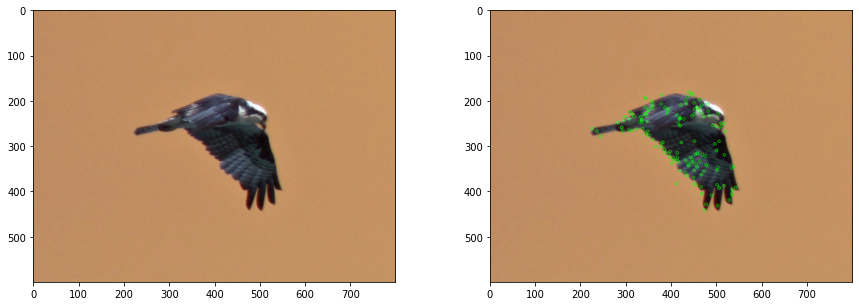

In [25]:
path=mixed.loc[0, 'google_path'] #0
sift = cv2.xfeatures2d.SIFT_create()
img = cv2.imread(path)
original_keypoints, original_descriptor = sift.detectAndCompute(img, None)
keypoints_without_size = np.copy(img)
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].imshow(img)
axs[1].imshow(cv2.drawKeypoints(img, original_keypoints, keypoints_without_size, color = (0, 255, 0)))
print('Num features:', len(original_keypoints))
plt.show()

Num features: 2555


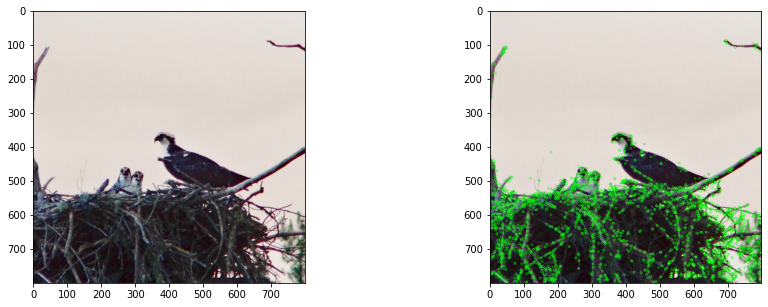

In [24]:
path=mixed.loc[25, 'google_path']
sift = cv2.xfeatures2d.SIFT_create()
img = cv2.imread(path)
original_keypoints, original_descriptor = sift.detectAndCompute(img, None)
keypoints_without_size = np.copy(img)
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].imshow(img)
axs[1].imshow(cv2.drawKeypoints(img, original_keypoints, keypoints_without_size, color = (0, 255, 0)))
print('Num features:', len(original_keypoints))
plt.show()

### Masked

In [ ]:
species_dict_miss, species_dict_correct = sift_comparison(masked)

100%|██████████| 12/12 [04:27<00:00, 22.28s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(masked['species'])
print('Saturation differences for masked photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for masked photos 

Pandion haliaetus t-value: -5.104***
Procyon lotor t-value: 0.832
Pachydiplax longipennis t-value: -3.852***
Canis latrans t-value: 1.418
Spinus tristis t-value: -0.452
Trachemys scripta elegans t-value: -1.547
Harmonia axyridis t-value: -2.873***
Picoides pubescens t-value: -1.09
Sciurus carolinensis t-value: 1.384
Junonia coenia t-value: 2.397**
Anolis carolinensis t-value: 1.007


### Vanilla

In [ ]:
species_dict_miss, species_dict_correct = sift_comparison(vanilla)

100%|██████████| 12/12 [05:36<00:00, 28.05s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(vanilla['species'])
print('Saturation differences for vanilla photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for vanilla photos 

Pandion haliaetus t-value: -5.849***
Procyon lotor t-value: 2.704***
Pachydiplax longipennis t-value: -7.113***
Canis latrans t-value: -0.472
Spinus tristis t-value: 0.819
Trachemys scripta elegans t-value: 0.227
Harmonia axyridis t-value: -0.098
Chelydra serpentina t-value: 2.338**
Picoides pubescens t-value: -0.866
Sciurus carolinensis t-value: 0.562
Junonia coenia t-value: 1.668*
Anolis carolinensis t-value: 0.325


### Bbcontent

In [ ]:
species_dict_miss, species_dict_correct = sift_comparison(bbcontent)

100%|██████████| 12/12 [05:17<00:00, 26.50s/it]


In [ ]:
from scipy.stats import ttest_ind
species_set=set(bbcontent['species'])
print('Saturation differences for bbcontent photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for bbcontent photos 

Pandion haliaetus t-value: -1.887*
Procyon lotor t-value: 0.495
Pachydiplax longipennis t-value: -6.137***
Canis latrans t-value: 0.851
Spinus tristis t-value: 0.446
Trachemys scripta elegans t-value: 0.145
Harmonia axyridis t-value: -1.652
Chelydra serpentina t-value: 4.084***
Picoides pubescens t-value: -1.036
Sciurus carolinensis t-value: -2.154**
Junonia coenia t-value: -1.778*
Anolis carolinensis t-value: 0.702


### Mixed

In [20]:
species_dict_miss, species_dict_correct = sift_comparison(mixed)

100%|██████████| 12/12 [06:44<00:00, 33.71s/it]


In [21]:
from scipy.stats import ttest_ind
species_set=set(mixed['species'])
print('Saturation differences for mixed photos \n')
for i in species_set:
  star=''
  if (len(species_dict_correct[i]) >0) and (len(species_dict_miss[i]) >0):
    p_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[1], 3)
    t_val = np.round(ttest_ind(species_dict_correct[i], species_dict_miss[i])[0], 3)
    if p_val<0.01:
      star='***'
    elif p_val<0.05:
      star='**'
    elif p_val<0.1:
      star='*' 
    print(i, 't-value:', f'{t_val}{star}')

Saturation differences for mixed photos 

Canis latrans t-value: 1.285
Sciurus carolinensis t-value: -0.856
Anolis carolinensis t-value: 0.476
Pachydiplax longipennis t-value: -8.263***
Procyon lotor t-value: 1.41
Pandion haliaetus t-value: -6.251***
Trachemys scripta elegans t-value: 0.25
Spinus tristis t-value: -0.716
Chelydra serpentina t-value: 2.318**
Harmonia axyridis t-value: 0.271
Junonia coenia t-value: -1.284
Picoides pubescens t-value: -1.051


## Extracting features
In this section we will store each feature for each testing image into a csv which will be used for later analyses.

In [48]:
def saturation_calculator(path, i):
  if i==2041:
      path = "/content/drive/MyDrive/Animals/Chelydra serpentina/f77483bfd0f4cc4c5900ee9a09c9e469.jpg"
  img = cv2.imread(path)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return img_hsv[:, :, 1].mean()

In [5]:
def sift_calculator(path,i):
  if i==2041:
      path = "/content/drive/MyDrive/Animals/Chelydra serpentina/f77483bfd0f4cc4c5900ee9a09c9e469.jpg"
  img = cv2.imread(path)
  sift = cv2.xfeatures2d.SIFT_create()
  img = cv2.imread(path)
  original_keypoints, original_descriptor = sift.detectAndCompute(img, None)
  return len(original_keypoints)

In [50]:
def contrast_calculator(path, i):
  if i==2041:
      path = "/content/drive/MyDrive/Animals/Chelydra serpentina/f77483bfd0f4cc4c5900ee9a09c9e469.jpg"
  img = cv2.imread(path)

  lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
  L,A,B=cv2.split(lab)

  # compute minimum and maximum in 5x5 region using erode and dilate
  kernel = np.ones((15,15),np.uint8)
  min = cv2.erode(L,kernel,iterations = 15)
  max = cv2.dilate(L,kernel,iterations = 15)

  # convert min and max to floats
  min = min.astype(np.float64) 
  max = max.astype(np.float64) 

  contrast = (max-min)/(max+min)
  average_contrast = 100*np.mean(contrast)
  return average_contrast

In [51]:
from collections import defaultdict
def image_brightness(path):
  img = cv2.imread(path)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
  return img_hsv[:,:,1].mean()
  
def brightness_calculator(df):
  """This fucntion returns two dictionaries, having as
    key the species of the dataframe passed and as values the brightness
    of the picture """
  bright=[]

  for img in tqdm(range(df.shape[0])):
    if img==2041:
      path = "/content/drive/MyDrive/Animals/Chelydra serpentina/f77483bfd0f4cc4c5900ee9a09c9e469.jpg"
    else:
      path = df['google_path'][img]
    bright.append(image_brightness(path))
      
  return bright

In [53]:
satur_m = []
sift_m=[]
contrast_m=[]
for i in tqdm(range(masked.shape[0])):
  satur_m.append(saturation_calculator(masked.loc[i, 'google_path'],i))
  sift_m.append(sift_calculator(masked.loc[i, 'google_path'],i))
  contrast_m.append(contrast_calculator(masked.loc[i, 'google_path'],i))
miss_cl = masked['misclassified'].tolist()
bright_m = brightness_calculator(masked)
masked_logit = pd.DataFrame({'misscl_masked':miss_cl,'saturation':satur_m, 'sift':sift_m, 'contrast':contrast_m, 'bright':bright_m})
masked_logit['species']=masked['species']
masked_logit['path']=masked['path']

100%|██████████| 2564/2564 [01:07<00:00, 38.08it/s]


In [ ]:
mixed['family']=0
for i in range(mixed.shape[0]):
  mixed.loc[i,'family']=family[mixed.loc[i, 'species']]

In [63]:
masked_logit['misscl_vanilla']=vanilla['misclassified']
masked_logit['misscl_bbcontent']=bbcontent['misclassified']
masked_logit['misscl_mixed']=mixed['misclassified']
masked_logit['misscl_mixed']=mixed['family']
masked_logit['family']=mixed['family']
masked_logit.to_csv('logit.csv', index=False)

In [76]:
masked_logit.head(2)

,misscl_masked,saturation,sift,contrast,bright,species,path,misscl_vanilla,misscl_bbcontent,misscl_mixed,family
0,0,122.619973,156,44.678057,122.619973,Pandion haliaetus,Animals/Pandion haliaetus/fdd144a72e5da77cff15...,0,0,0,aves
1,1,80.271130,2784,76.915200,80.271130,Spinus tristis,Animals/Spinus tristis/e9c56231718b9b11758f5f9...,0,0,0,aves


##### SIFT distributions between context of the picture and content of the bounding box 

In [2]:
def sift_extractor(path):
    sift = cv2.xfeatures2d.SIFT_create()
    img = cv2.imread(path)
    original_keypoints, original_descriptor = sift.detectAndCompute(img, None)
    keypoints_without_size = np.copy(img)
    return len(original_keypoints)

In [8]:
sift_masked = []
sift_bbcontent = []

for path in tqdm(vanilla['path']):
    masked_pic = 'Animals_masked'+path[7:]
    bbcontent_pic = 'Animals_bbcontent'+path[7:]
    sift_masked.append(sift_calculator(masked_pic, 1))
    sift_bbcontent.append(sift_calculator(bbcontent_pic, 1))

100%|██████████| 2564/2564 [10:03<00:00,  4.25it/s]


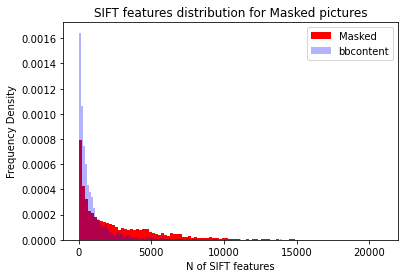

In [18]:
#fig, axes = plt.subplots(ncols = 2, figsize = (15,15))
#ax = axes.ravel()

plt.hist(sift_masked, bins = 100, density = True, color = 'red', label = 'Masked')
plt.hist(sift_bbcontent, bins = 100, density = True, color = 'blue', label = 'bbcontent', alpha = 0.3)
plt.title('SIFT features distribution for Masked pictures')
plt.xlabel('N of SIFT features')
plt.ylabel('Frequency Density')
plt.legend()
plt.show()

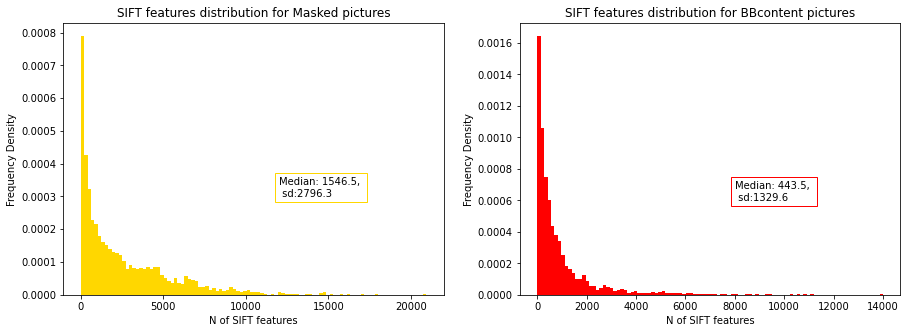

In [52]:
fig, axes = plt.subplots(ncols = 2, figsize = (15,5))
ax = axes.ravel()

ax[0].hist(sift_masked, bins = 100, density = True, color = 'gold', label = 'Masked')
ax[0].set_title('SIFT features distribution for Masked pictures')
ax[0].set_xlabel('N of SIFT features')
ax[0].set_ylabel('Frequency Density')
ax[0].text(12000, 0.0003, f'Median: {round(np.median(sift_masked),1)}, \n sd:{round(np.std(sift_masked),1)}',bbox=dict(facecolor='none', edgecolor='gold'))

ax[1].hist(sift_bbcontent, bins = 100, density = True, color = 'red', label = 'Masked')
ax[1].set_title('SIFT features distribution for BBcontent pictures')
ax[1].set_xlabel('N of SIFT features')
ax[1].set_ylabel('Frequency Density')
ax[1].text(8000,0.0006 , f'Median: {round(np.median(sift_bbcontent),1)}, \n sd:{round(np.std(sift_bbcontent),1)}',bbox=dict(facecolor='none', edgecolor='red'))

plt.show()

## Family predictions 
In this section we will extract the families confusion matrices for each model.

In [70]:
reptilia = ['Anolis carolinensis', 'Chelydra serpentina', 'Trachemys scripta elegans']
mammalia = ['Canis latrans', 'Procyon lotor', 'Sciurus carolinensis']
aves = ['Pandion haliaetus', 'Picoides pubescens', 'Spinus tristis']
insecta = ['Harmonia axyridis', 'Junonia coenia', 'Pachydiplax longipennis']
species = reptilia + mammalia + aves + insecta

family = dict()
for i in range(len(species)):
  if species[i] in reptilia:
    family[species[i]] = 'reptilia'
  elif species[i] in mammalia:
    family[species[i]] = 'mammalia'
  elif species[i] in aves:
    family[species[i]] = 'aves'
  elif species[i] in insecta:
    family[species[i]] = 'insecta'

### bbcontent

In [ ]:
from collections import defaultdict
bbcontent['family']=0
for i in range(bbcontent.shape[0]):
  bbcontent.loc[i,'family']=family[bbcontent.loc[i, 'species']]
temp_df = bbcontent[bbcontent['misclassified']==0].reset_index(drop=True)
pred_fam_dict={}
for i in range(temp_df.shape[0]):
  pred_fam_dict[temp_df.loc[i, 'predicted_label']] = temp_df.loc[i, 'family']
bbcontent['pred_family']=0
for i in range(bbcontent.shape[0]):
  bbcontent.loc[i,'pred_family']=pred_fam_dict[bbcontent.loc[i, 'predicted_label']]

y axis = pred


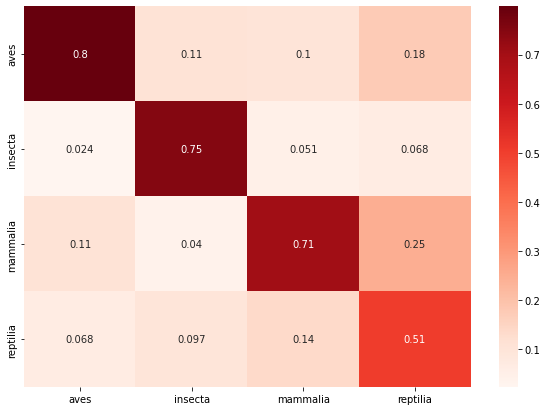

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(bbcontent['family'],bbcontent['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia'])/np.sum(confusion_matrix(bbcontent['family'],bbcontent['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia']), axis=0), index = ['aves', 'insecta', 'mammalia', 'reptilia'],
                  columns = ['aves', 'insecta', 'mammalia', 'reptilia'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Vanilla

In [ ]:
from collections import defaultdict
vanilla['family']=0
for i in range(vanilla.shape[0]):
  vanilla.loc[i,'family']=family[vanilla.loc[i, 'species']]
temp_df = vanilla[vanilla['misclassified']==0].reset_index(drop=True)
pred_fam_dict={}
for i in range(temp_df.shape[0]):
  pred_fam_dict[temp_df.loc[i, 'predicted_label']] = temp_df.loc[i, 'family']
vanilla['pred_family']=0
for i in range(vanilla.shape[0]):
  vanilla.loc[i,'pred_family']=pred_fam_dict[vanilla.loc[i, 'predicted_label']]

y axis = pred


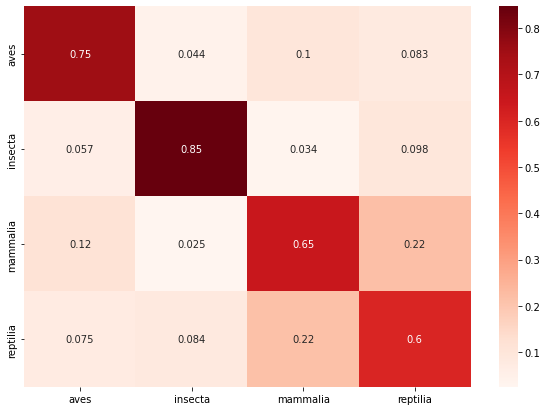

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(vanilla['family'],vanilla['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia'])/np.sum(confusion_matrix(vanilla['family'],vanilla['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia']), axis=0), index = ['aves', 'insecta', 'mammalia', 'reptilia'],
                  columns = ['aves', 'insecta', 'mammalia', 'reptilia'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Masked

In [ ]:
from collections import defaultdict
masked['family']=0
for i in range(masked.shape[0]):
  masked.loc[i,'family']=family[masked.loc[i, 'species']]
temp_df = masked[masked['misclassified']==0].reset_index(drop=True)
pred_fam_dict={}
for i in range(temp_df.shape[0]):
  pred_fam_dict[temp_df.loc[i, 'predicted_label']] = temp_df.loc[i, 'family']
pred_fam_dict['2']='reptilia'
masked['pred_family']=0
for i in range(masked.shape[0]):
  masked.loc[i,'pred_family']=pred_fam_dict[masked.loc[i, 'predicted_label']]

y axis = pred


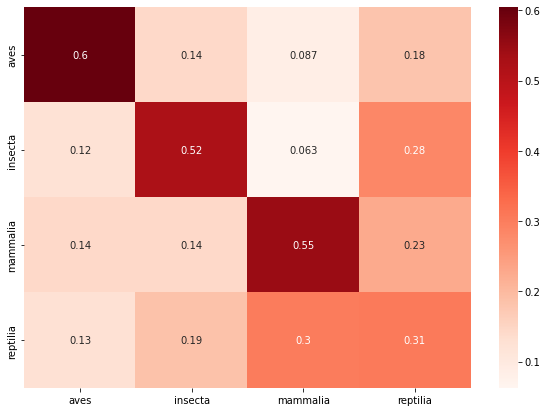

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(masked['family'],masked['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia'])/np.sum(confusion_matrix(masked['family'],masked['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia']), axis=0), index = ['aves', 'insecta', 'mammalia', 'reptilia'],
                  columns = ['aves', 'insecta', 'mammalia', 'reptilia'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Mixed

In [23]:
from collections import defaultdict
mixed['family']=0
for i in range(mixed.shape[0]):
  mixed.loc[i,'family']=family[mixed.loc[i, 'species']]
temp_df = mixed[mixed['misclassified']==0].reset_index(drop=True)
pred_fam_dict={}
for i in range(temp_df.shape[0]):
  pred_fam_dict[temp_df.loc[i, 'predicted_label']] = temp_df.loc[i, 'family']
mixed['pred_family']=0
for i in range(mixed.shape[0]):
  mixed.loc[i,'pred_family']=pred_fam_dict[mixed.loc[i, 'predicted_label']]

y axis = pred


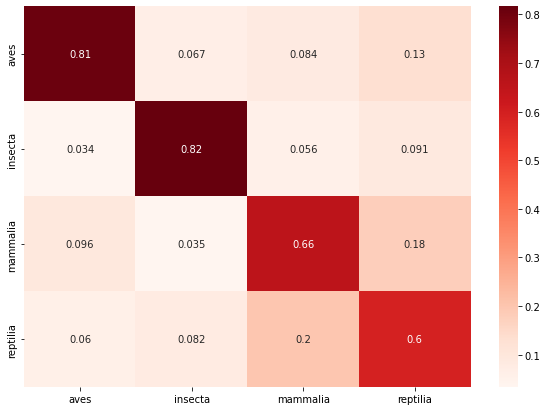

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(mixed['family'],mixed['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia'])/np.sum(confusion_matrix(mixed['family'],mixed['pred_family'],labels=['aves', 'insecta', 'mammalia', 'reptilia']), axis=0), index = ['aves', 'insecta', 'mammalia', 'reptilia'],
                  columns = ['aves', 'insecta', 'mammalia', 'reptilia'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

## Species predictions
In this section we will extract the species confusion matrices for each model.

### Masked

y axis = pred


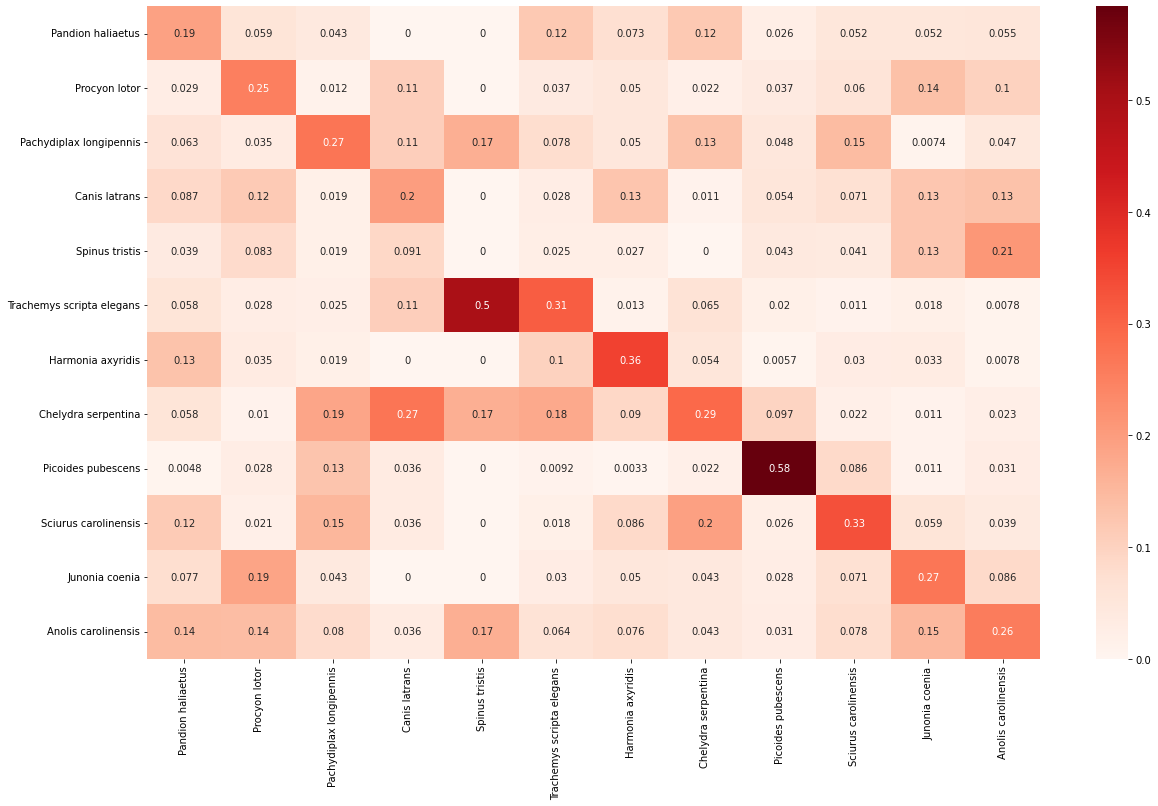

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(masked['label'],masked['predicted_label'])/np.sum(confusion_matrix(masked['label'],masked['predicted_label']), axis=0), index = set(masked.species),
                  columns = set(masked.species))
plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Vanilla

y axis = pred


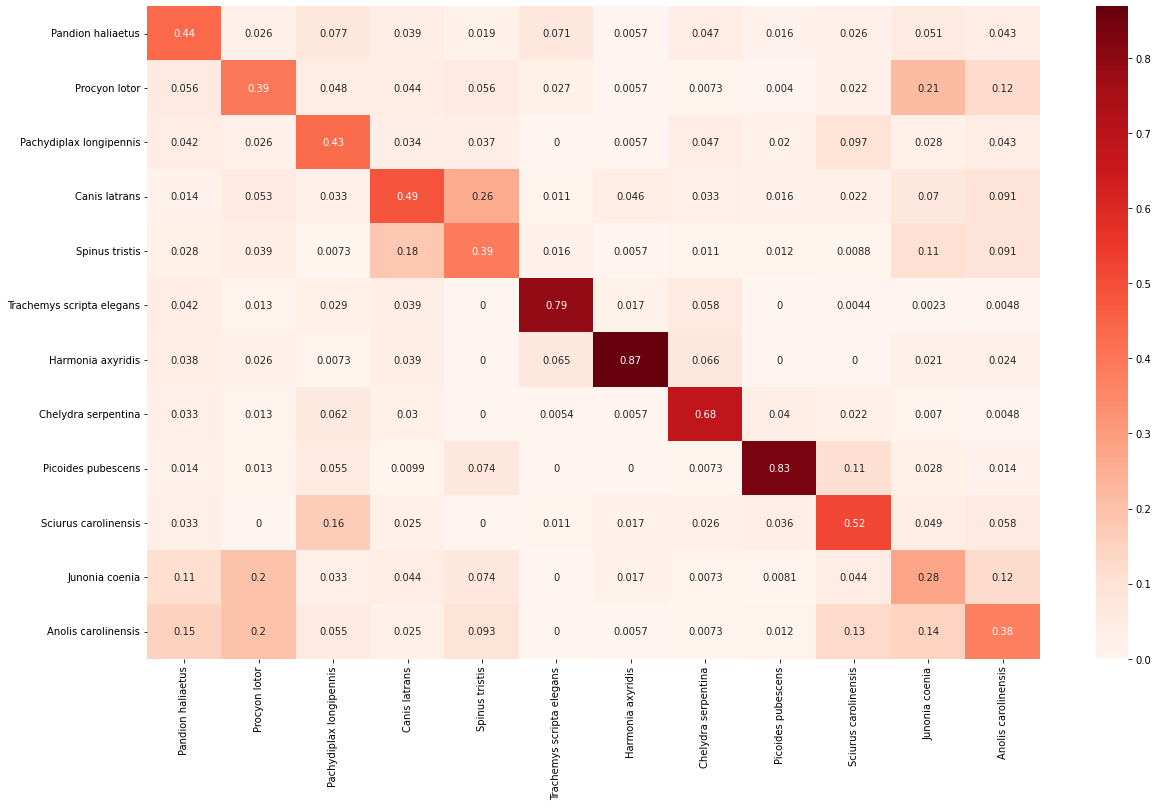

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(vanilla['label'],vanilla['predicted_label'])/np.sum(confusion_matrix(vanilla['label'],vanilla['predicted_label']), axis=0), index = set(vanilla.species),
                  columns = set(vanilla.species))
plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Bbcontent

y axis = pred


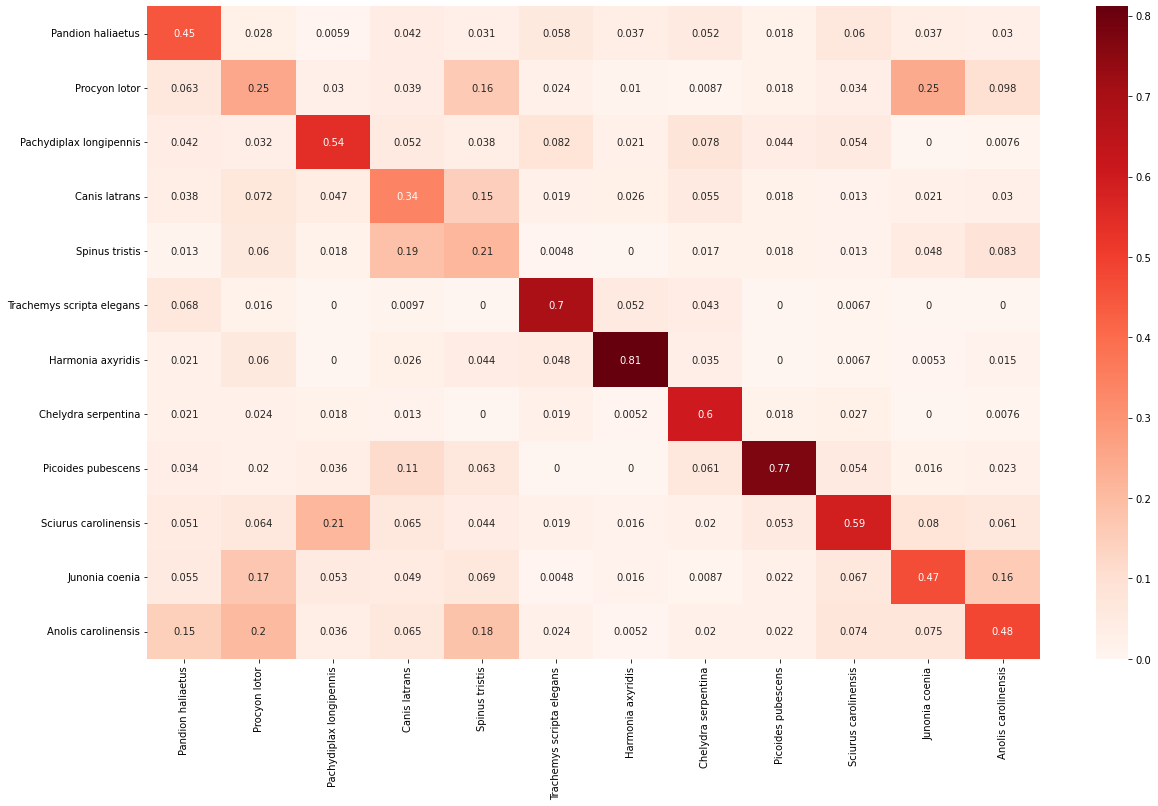

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(bbcontent['label'],bbcontent['predicted_label'])/np.sum(confusion_matrix(bbcontent['label'],bbcontent['predicted_label']), axis=0), index = set(bbcontent.species),
                  columns = set(bbcontent.species))
plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')

### Mixed

y axis = pred


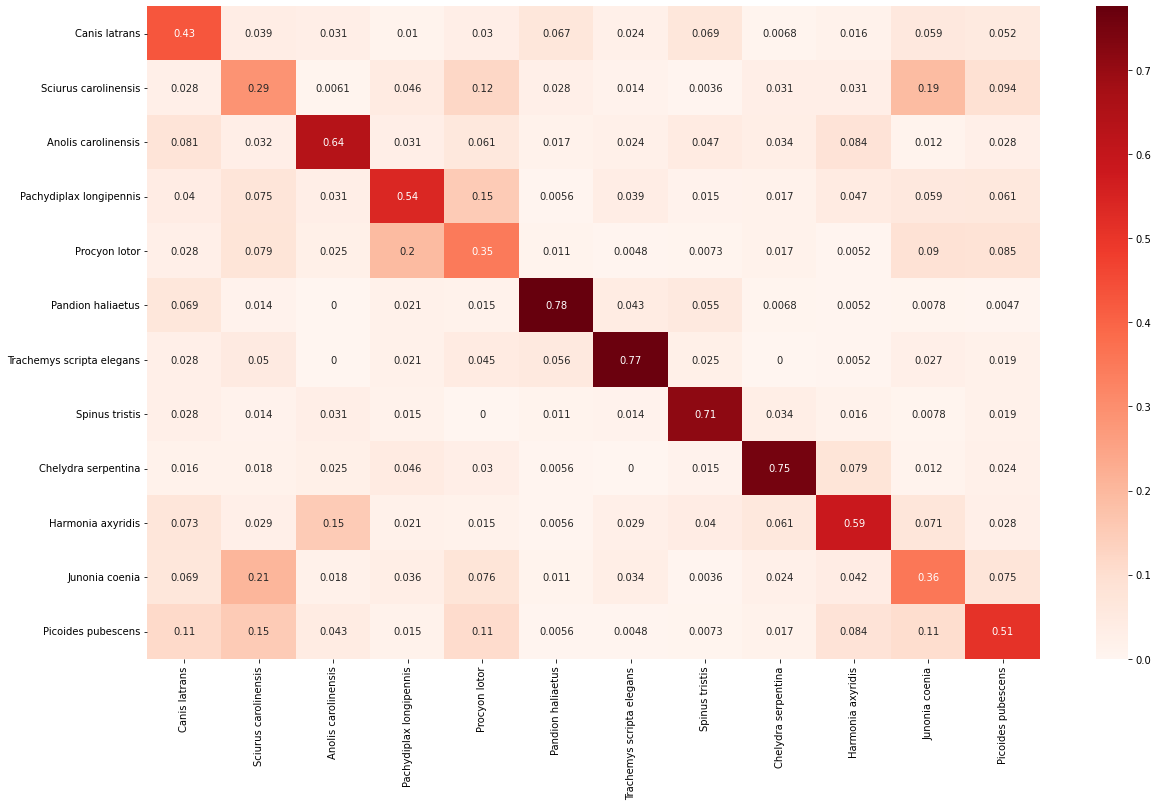

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(mixed['label'],mixed['predicted_label'])/np.sum(confusion_matrix(mixed['label'],mixed['predicted_label']), axis=0), index = set(mixed.species),
                  columns = set(mixed.species))
plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True, cmap='Reds')
print('y axis = pred')